In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [5]:
# Download IMDB dataset
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 # distrubute multi-hot encoding
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 5s 0us/step


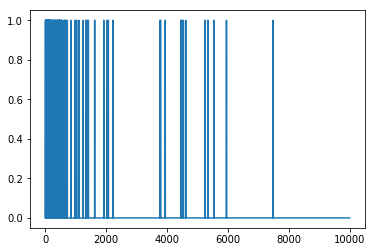

In [7]:
plt.plot(train_data[0])

In [8]:
# Create baseline model
baseline_model = keras.Sequential([
    # 'input shape' is only required here so that '.summary' works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy','binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 8s - loss: 0.4683 - acc: 0.8084 - binary_crossentropy: 0.4683 - val_loss: 0.3233 - val_acc: 0.8767 - val_binary_crossentropy: 0.3233
Epoch 2/20
 - 7s - loss: 0.2388 - acc: 0.9135 - binary_crossentropy: 0.2388 - val_loss: 0.2849 - val_acc: 0.8865 - val_binary_crossentropy: 0.2849
Epoch 3/20
 - 3s - loss: 0.1757 - acc: 0.9386 - binary_crossentropy: 0.1757 - val_loss: 0.2931 - val_acc: 0.8846 - val_binary_crossentropy: 0.2931
Epoch 4/20
 - 3s - loss: 0.1379 - acc: 0.9528 - binary_crossentropy: 0.1379 - val_loss: 0.3210 - val_acc: 0.8785 - val_binary_crossentropy: 0.3210
Epoch 5/20
 - 3s - loss: 0.1105 - acc: 0.9642 - binary_crossentropy: 0.1105 - val_loss: 0.3500 - val_acc: 0.8743 - val_binary_crossentropy: 0.3500
Epoch 6/20
 - 4s - loss: 0.0844 - acc: 0.9758 - binary_crossentropy: 0.0844 - val_loss: 0.3827 - val_acc: 0.8695 - val_binary_crossentropy: 0.3827
Epoch 7/20
 - 3s - loss: 0.0623 - acc: 0.9856 - binary_crossentropy:

In [14]:
# Create a smaller model
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [15]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 9s - loss: 0.6442 - acc: 0.7714 - binary_crossentropy: 0.6442 - val_loss: 0.5861 - val_acc: 0.8295 - val_binary_crossentropy: 0.5861
Epoch 2/20
 - 4s - loss: 0.5055 - acc: 0.8586 - binary_crossentropy: 0.5055 - val_loss: 0.4578 - val_acc: 0.8531 - val_binary_crossentropy: 0.4578
Epoch 3/20
 - 3s - loss: 0.3824 - acc: 0.8808 - binary_crossentropy: 0.3824 - val_loss: 0.3728 - val_acc: 0.8708 - val_binary_crossentropy: 0.3728
Epoch 4/20
 - 3s - loss: 0.3038 - acc: 0.8996 - binary_crossentropy: 0.3038 - val_loss: 0.3259 - val_acc: 0.8784 - val_binary_crossentropy: 0.3259
Epoch 5/20
 - 3s - loss: 0.2558 - acc: 0.9145 - binary_crossentropy: 0.2558 - val_loss: 0.3018 - val_acc: 0.8846 - val_binary_crossentropy: 0.3018
Epoch 6/20
 - 3s - loss: 0.2235 - acc: 0.9238 - binary_crossentropy: 0.2235 - val_loss: 0.2891 - val_acc: 0.8865 - val_binary_crossentropy: 0.2891
Epoch 7/20
 - 3s - loss: 0.1997 - acc: 0.9316 - binary_crossentropy:

In [17]:
# Create bigger model
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [18]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 18s - loss: 0.3461 - acc: 0.8548 - binary_crossentropy: 0.3461 - val_loss: 0.2933 - val_acc: 0.8819 - val_binary_crossentropy: 0.2933
Epoch 2/20
 - 14s - loss: 0.1369 - acc: 0.9506 - binary_crossentropy: 0.1369 - val_loss: 0.3566 - val_acc: 0.8643 - val_binary_crossentropy: 0.3566
Epoch 3/20
 - 14s - loss: 0.0443 - acc: 0.9872 - binary_crossentropy: 0.0443 - val_loss: 0.4381 - val_acc: 0.8670 - val_binary_crossentropy: 0.4381
Epoch 4/20
 - 17s - loss: 0.0072 - acc: 0.9988 - binary_crossentropy: 0.0072 - val_loss: 0.5863 - val_acc: 0.8690 - val_binary_crossentropy: 0.5863
Epoch 5/20
 - 15s - loss: 0.0010 - acc: 1.0000 - binary_crossentropy: 0.0010 - val_loss: 0.6785 - val_acc: 0.8705 - val_binary_crossentropy: 0.6785
Epoch 6/20
 - 15s - loss: 3.7089e-04 - acc: 1.0000 - binary_crossentropy: 3.7089e-04 - val_loss: 0.7128 - val_acc: 0.8685 - val_binary_crossentropy: 0.7128
Epoch 7/20
 - 14s - loss: 6.6260e-04 - acc: 1.0000 - b

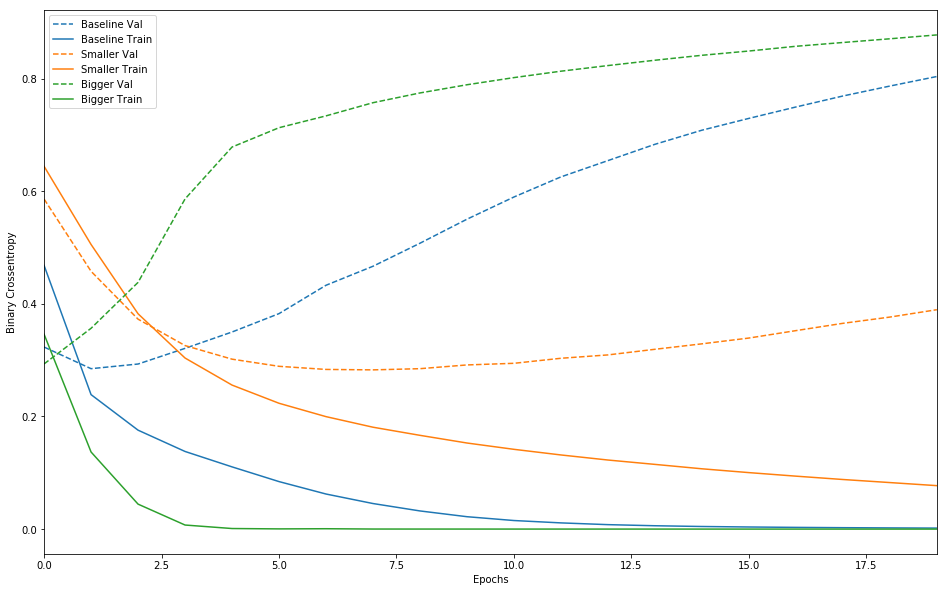

In [19]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    
    plt.xlim([0,max(history.epoch)])
    
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])